In [1]:
import holidays
import pandas as pd

# Read
## BDEW

<AxesSubplot:xlabel='periodFrom'>

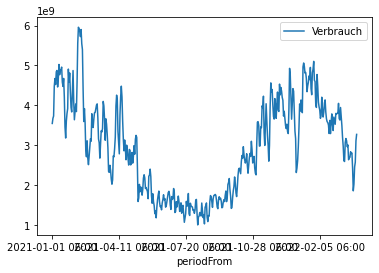

In [6]:
bdew = pd.read_csv('../data/bdew.csv', index_col=0)
bdew.plot()

In [ ]:
# SLP (modeled)
# Power plants (ENTSO-E)
# THE SLP
# THE RLM
# THE SUM
# Gas price (TTF)

## Derived
# BDEW_residual = BDEW - power plants
# THE RLS residual ...
# THE SUM residual

Time dummies

In [ ]:
df['time'] = range(len(df))
df['time'] = df['time'].apply(float)
df['year'] = df['cet_cest_timestamp'].apply(lambda x: x[:4])
df['month'] = df['cet_cest_timestamp'].apply(lambda x: x[5:7])

In [ ]:
df['weekday'] = df['cet_cest_timestamp'].apply(lambda x: pd.Timestamp(x).day_name())
df['weekday_num'] = df['cet_cest_timestamp'].apply(lambda x: pd.Timestamp(x).weekday())
df['monday'] = df['weekday'].apply(lambda x: int(x=="Monday"))
df['friday'] = df['weekday'].apply(lambda x: int(x=="Friday"))
df['weekend'] = df['weekday'].apply(lambda x: int(x in ["Saturday", "Sunday"]))

In [ ]:
df['christmas_period'] = df['cet_cest_timestamp'].apply(
    lambda x: int((pd.Timestamp(x).month==12)&(pd.Timestamp(x).day in range(24,32)))
)

In [ ]:
country_holidays = holidays.CountryHoliday('DE', prov='BY')
df['holiday'] = df['cet_cest_timestamp'].apply(lambda x: int(pd.Timestamp(x) in country_holidays))
df['bridgeday'] = ((
    (df['holiday'].shift(24) + df['holiday'].shift(-24)) * 
    (df['weekend'].shift(24) + df['weekend'].shift(-24))
) > 0).apply(int)